# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *mlp.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.

## Note: you will deal with a lot of different types data in this exercise! For quick inspection and easier debugging (including when you need to ask a TA for help) use the Spyder IDE and its Variable explorer tab.

##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function imshow() to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


C:\Users\Marit\Anaconda2\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Marit\Anaconda2\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


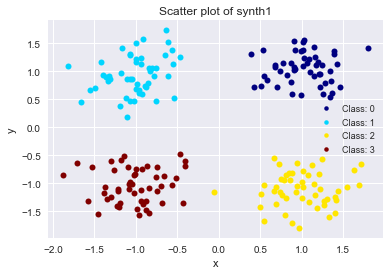

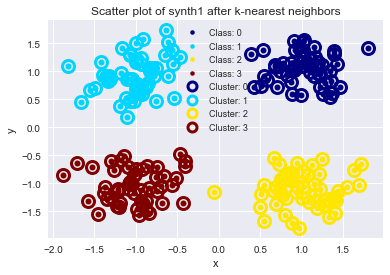

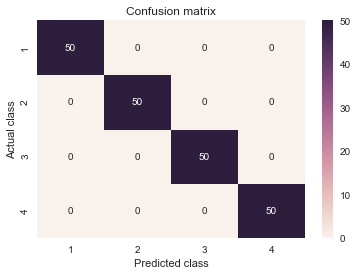

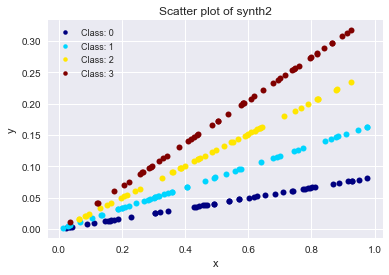

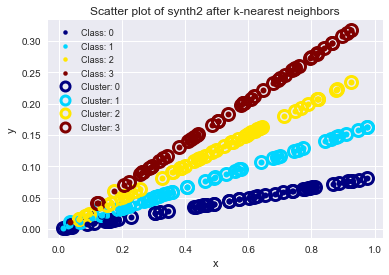

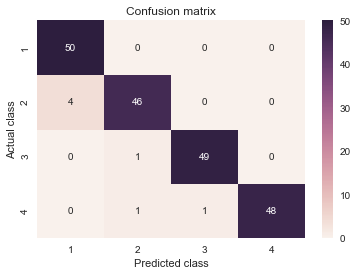

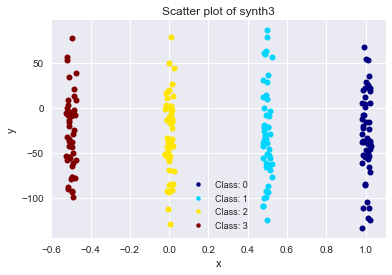

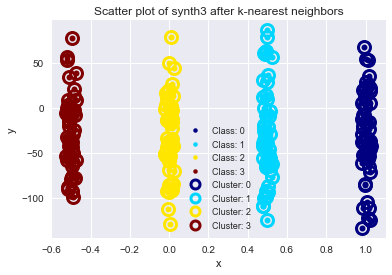

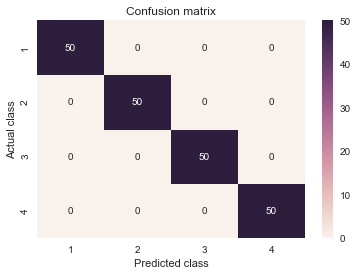

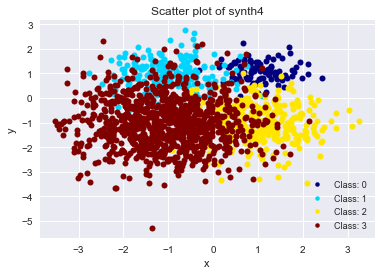

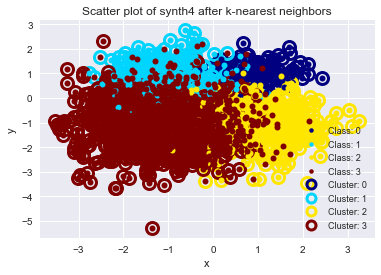

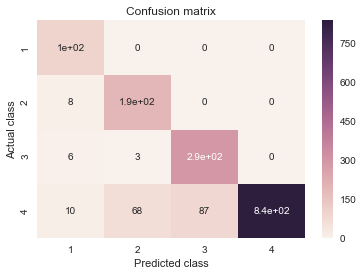

In [26]:
import seaborn as sn
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()
    
def plotClusterData(X, y, clusterid=None):
    X = np.asarray(X)
    y = np.asarray(y)
    if clusterid is not None:
        clusterid = np.asarray(clusterid)
        clusters = np.unique(clusterid)
        nclusters = np.size(clusters)
    else:
        nclusters = 0
    classes = np.unique(y)
    nclasses = np.size(classes)
    ncolors = np.max([nclasses, nclusters])

    # plot data points color-coded by class
    plt.hold(True)
    colors = [0]*ncolors
    for color in range(ncolors):
        colors[color] = plt.cm.jet.__call__(color*255/(ncolors-1))[:3]
    for i, cs in enumerate(classes):
        plt.plot(X[(y == cs).ravel(), 0], X[(y == cs).ravel(), 1], 'o',
                 markeredgecolor='k', markerfacecolor=colors[i], markersize=6,
                 zorder=2)
    if clusterid is not None: 
        for i, cr in enumerate(clusters):
            plt.plot(X[(clusterid == cr).ravel(), 0], X[(clusterid == cr).ravel(), 1], 'o',
                     markersize=12, markeredgecolor=colors[i],
                     markerfacecolor='None', markeredgewidth=3, zorder=1)
    plt.hold(False)

    # create legend
    if clusterid is None:
        legend_items = classes.tolist()
    else:
        legend_items = (classes.tolist() + clusters.tolist())
    for i in range(len(legend_items)):
        if i < nclasses:
            legend_items[i] = 'Class: {0}'.format(legend_items[i])
        elif i < nclasses + nclusters:
            legend_items[i] = 'Cluster: {0}'.format(legend_items[i])
    plt.legend(legend_items, numpoints=1, markerscale=.75, prop={'size': 9})

 # synth1
synth1_data = loadmat('Data/synth1.mat')
X_synth1 = synth1_data['X']
y_synth1 = synth1_data['y'].ravel()

plotClusterData(X_synth1, y_synth1)
plt.title("Scatter plot of synth1")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

nr = 4
neighbors = KNeighborsClassifier(n_neighbors = nr, metric = "cityblock")
neighbors.fit(X_synth1, y_synth1)
new_y_synth1 = neighbors.predict(X_synth1)
plotClusterData(X_synth1, y_synth1, new_y_synth1)
plt.title("Scatter plot of synth1 after k-nearest neighbors")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plot_confusion_matrix(confusion_matrix(y_synth1, new_y_synth1), y_synth1)


 # synth2
synth2_data = loadmat('Data/synth2.mat')
X_synth2 = synth2_data['X']
y_synth2 = synth2_data['y'].ravel()

plotClusterData(X_synth2, y_synth2)
plt.title("Scatter plot of synth2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

nr = 2
neighbors = KNeighborsClassifier(n_neighbors = nr, metric = "euclidean")
neighbors.fit(X_synth2, y_synth2)
new_y_synth2 = neighbors.predict(X_synth2)
plotClusterData(X_synth2, y_synth2, new_y_synth2)
plt.title("Scatter plot of synth2 after k-nearest neighbors")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plot_confusion_matrix(confusion_matrix(y_synth2, new_y_synth2), y_synth2)


 # synth3
synth3_data = loadmat('Data/synth3.mat')
X_synth3 = synth3_data['X']
y_synth3 = synth3_data['y'].ravel()

plotClusterData(X_synth3, y_synth3)
plt.title("Scatter plot of synth3")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

nr = 1
neighbors = KNeighborsClassifier(n_neighbors = nr, metric = "cityblock")
neighbors.fit(X_synth3, y_synth3)
new_y_synth3 = neighbors.predict(X_synth3)
plotClusterData(X_synth3, y_synth3, new_y_synth3)
plt.title("Scatter plot of synth3 after k-nearest neighbors")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plot_confusion_matrix(confusion_matrix(y_synth3, new_y_synth3), y_synth3)


 # synth4
synth4_data = loadmat('Data/synth4.mat')
X_synth4 = synth4_data['X']
y_synth4 = synth4_data['y'].ravel()

plotClusterData(X_synth4, y_synth4)
plt.title("Scatter plot of synth4")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

nr = 2
neighbors = KNeighborsClassifier(n_neighbors = nr, metric = "cityblock")
neighbors.fit(X_synth4, y_synth4)
new_y_synth4 = neighbors.predict(X_synth4)
plotClusterData(X_synth4, y_synth4, new_y_synth4)
plt.title("Scatter plot of synth4 after k-nearest neighbors")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plot_confusion_matrix(confusion_matrix(y_synth4, new_y_synth4), y_synth4)

*Answer for 6.1.1:*

##### Synth1
We chose to use the 4 nearest neighbors and cityblock as the distance measure, because then the algorithm clusters all the datapoints right.
    
##### Synth2
We chose euclidean distance, because it performs better than cityblock. We chose 2 nearest neighbors, because with more neighbors it makes a lot of misclassifications.
    
##### Synth3
We chose cityblock distance, because it performs better than euclidean. We chose 1 nearest neigbor, because of the scale of the axis. The y axis is way further appart than the x axis.
    
##### Synth4
We chose cityblock distance, because it performs better than euclidean. We chose 2 nearest neigbor, because the point are pretty close to each other.

It is good to use a small number of neighbors, when the borders of the different clusters are close to each other.
It is good to use a large number, if the borders are far appart.


#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

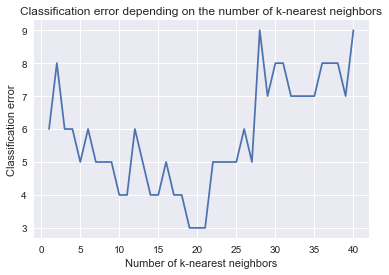

In [28]:
from sklearn.model_selection import LeaveOneOut

iris = pd.read_excel('Data/iris.xls')
iris.head()

X_iris = iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y_iris = iris['Type'].ravel()


loo = LeaveOneOut()

error = []

for k in range(1,41):
    error_k = 0
    for train_index, test_index in loo.split(X_iris):
        X_train, X_test = X_iris.iloc[train_index], X_iris.iloc[test_index]
        y_train, y_test = y_iris[train_index], y_iris[test_index]

        nr = k
        neighbors = KNeighborsClassifier(n_neighbors = nr, metric = "euclidean")
        neighbors.fit(X_train, y_train)
        new_y_iris = neighbors.predict(X_test)
        if not np.array_equal(new_y_iris, y_test):
            error_k = error_k + 1
    error.append(error_k)

plt.plot(range(1,41), error)
plt.title("Classification error depending on the number of k-nearest neighbors")
plt.xlabel("Number of k-nearest neighbors")
plt.ylabel("Classification error")
plt.show()


*Answer for 6.1.2:*

The optimal number of neighbors to use for the data is 19, 20 or 21 neighbors. In this case the classification makes the least amount of errors. An average of three errors.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

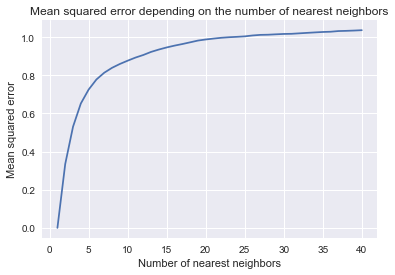

In [4]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error

wine = loadmat('Data/wine.mat')

X = wine['X']
X_wine = X[:,:10]
alcohol = X[:,-1].ravel()

error = []
for k in range(1,41):
    neighbors = NearestNeighbors(n_neighbors = k)
    neighbors.fit(X_wine)
    indices = neighbors.kneighbors(X_wine, return_distance=False)
    predictions = []
    for index in indices:
        prediction = np.mean(alcohol[index])
        predictions.append(prediction)
    error_k = mean_squared_error(alcohol, predictions)
    error.append(error_k)

plt.plot(range(1,41), error)
plt.title("Mean squared error depending on the number of nearest neighbors")
plt.xlabel("Number of nearest neighbors")
plt.ylabel("Mean squared error")
plt.show()


*Answer for 6.1.3:*

The optimal value for the nearest neighbors is 1. Here the mean squared error is 0.0, which is the optimal value.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class MLP contained in the `mlp.py` file can be used to create a Multilayer Perceptron that can learn weights that minimize $W = \{W_o,W_h\}$ the objective function $E(X,y,(W_o,W_h)) = \sum_i (f(W_o*f(W_h*X_i)) - y_i)$ for any dataset X with corresponding labels y. We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the MLP class in the Toolbox and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single layer perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is the sigmoid function. Why does it not make sense for an MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The function that learns the weights W mentioned above is the function `learn_weights()` which has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `nhidden`:

> `nepochs`:

> `eta`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1]).reshape(4,1)`
     
   The command `perceptron = mlp.MLP(Xtest,ytest)` will create a instance of the MLP class. Now you can learn the weights for one hidden unit by using `wh,wo,c = perceptron.learn_weights()`. What are the weights after learning? And the classification error? use the function `perceptron.plot_boundaries(wh,wo,Xtest)` to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

##### NOTE: the weights are initiated randomly -- if the result looks strange, it may help to run the learning process again.

wh: [ 4.79966006 -4.88132315 -4.88132184]
wo: [-6.13707255]
Classification error:  0.0


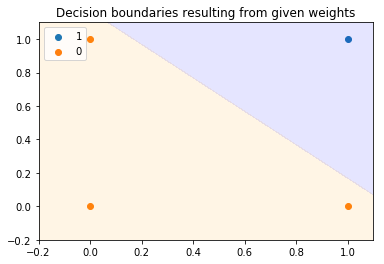

In [1]:
import mlp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Xtest = np.array([[0,0], [0,1], [1,0], [1,1]])
ytest = np.array([0,0,0,1]).reshape(4,1)

perceptron = mlp.MLP(Xtest, ytest)
wh, wo, c = perceptron.learn_weights(verbose = False)

print("wh: " + str(wh.ravel()))
print("wo: " + str(wo.ravel()))
print('Classification error:  ' + str(c))

perceptron.plot_boundaries(wh, wo, Xtest)

*Answer for 6.2.1:*

1. We do not use a linear activation function to prevent overgeneralisation. With a linear function, the value keeps increasing. With the sigmoid, the function stays between -1 and 1.

2. 

    * nhidden: number of units in the hidden layer. If nhidden is high, the learning process will result in overfitting and it needs more time to train the network. If nhidden is low, the learning process will result in underfitting. 

    * nepochs: number of learning steps. If nepochs is low, the learning process might not be finished yet. If nepochs is high, the learning process might be already finished, so the weights do not change anymore.

    * eta: learning rate. If eta is high, the weights change quicker and more. If eta is low, the weights need more time to learn and perform better.
    
3. wh is [ 4.79966006, -4.88132315, -4.88132184] and wo is -6.13707255. The classification error is 0.0.
   It works well with one hidden unit, because there are only 4 datapoints. So, it does not have to learn a lot. If you use more hidden units, the algorithm does not improve or get worst. So you do not need more hidden units.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make a scatter plot of the two attributes in `X`, coloring the points according to the class label `y`. How are `X` and `y` related?

C:\Users\Marit\Anaconda2\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Marit\Anaconda2\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


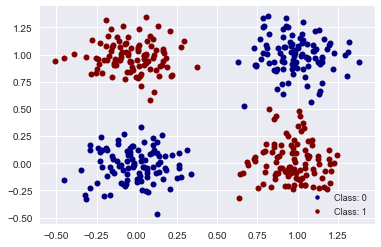

In [3]:
from scipy.io import loadmat

xor = loadmat('Data/xor.mat')
X_xor = xor['X']
y_xor = xor['y']

plotClusterData(X_xor, y_xor)

*Answer for 6.2.2:*

x and y are somehow related. If x and y are similar then they belong in the same class, class 0 (for example, x = 1.1 and y = 0.9). If x and y are completely different from eachother they belong to the same class, class 1 (for example, x = 0.1 and y = 1.1). 

You will now use the MLP class to create and learn the weights of a mlp. The constructor `mlp.MLP(X,y)` takes 2 arguments, X and y. Save the instance you created in a variable `perceptron`. The function `learn_weights()` will return the weights between the input layer and hidden layer, `W_h`, the weights between the hidden layer and the output layer, `W_o`, and the classification error  


#### 6.2.3 (2 points)
Create a MLP using X and y. Learn the weights `Wh,Wo` using 1 hidden unit. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. Since the algorithm doesn't always converge, restart the learning process 5 times in each fold and take the best classification error.  

You can get the training error from the `learn_weights()` function. Set the optional parameter `verbose=False` to prevent cluttering the output with print statements. The test error can be obtained by feeding the test data through the network using the function `forwardprop(W_h,W_o,X=X_test)`. `forwardprop` will then return a few variables (h,o,grad_h,grad_o, and y_hat), of which the last is the output of the network. You can compare this output `y_hat` to the actual labels in `y_test`. So:

>`_,_,_,_,y_hat = perceptron.forwardprop(Wh,Wo,X=X_test)
> test_error = ... #compare y_hat to y_test`




Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

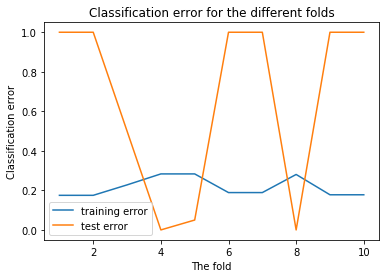

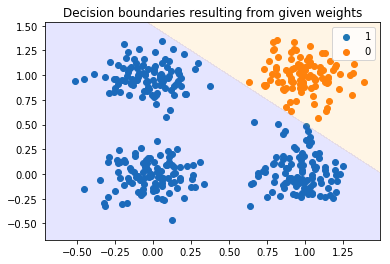

In [6]:
from scipy.io import loadmat
from sklearn.model_selection import KFold

xor = loadmat('Data/xor.mat')
X_xor = xor['X']
y_xor = xor['y']

perceptron = mlp.MLP(X_xor,y_xor)
w_h,w_o,c = perceptron.learn_weights(nhidden=1, verbose = False)

train_errors = []
test_errors = []

K = 10
CV = KFold(n_splits=K)
for train_index, test_index in CV.split(X_xor):
    X_train, X_test = X_xor[train_index], X_xor[test_index]
    y_train, y_test = y_xor[train_index], y_xor[test_index]
    
    train_error = float("inf")
    test_error = 0
    for i in range(0, 5):
        perceptron2 = mlp.MLP(X_train,y_train)
        wh, wo, c = perceptron2.learn_weights(nhidden=1, verbose = False)
        
        if c < train_error:
            train_error = c
            _,_,_,_,y_hat = perceptron2.forwardprop(wh, wo, X = X_test)
            test_error = perceptron2.class_error(y_test, y_hat)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(range(1,len(train_errors)+1), train_errors, range(1,len(test_errors)+1), test_errors)
plt.title("Classification error for the different folds")
plt.xlabel("The fold")
plt.ylabel("Classification error")
plt.legend(["training error", "test error"])
plt.show()

perceptron.plot_boundaries(w_h,w_o,X_xor)

*Answer for 6.2.3:*

The network performs so poorly, because it can only make one decision boundaries and in this data set you need at least two boundaries. So it is not able to classify the data into the right classes.

#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

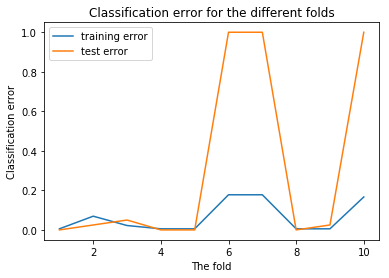

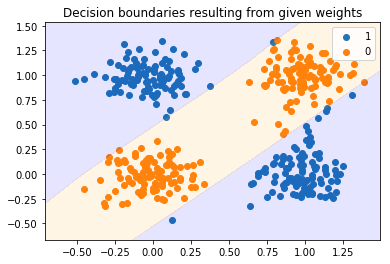

In [8]:
perceptron = mlp.MLP(X_xor,y_xor)
w_h,w_o,c = perceptron.learn_weights(nhidden=2, verbose = False)

train_errors = []
test_errors = []

K = 10
CV = KFold(n_splits=K)
for train_index, test_index in CV.split(X_xor):
    X_train, X_test = X_xor[train_index], X_xor[test_index]
    y_train, y_test = y_xor[train_index], y_xor[test_index]
    
    train_error = float("inf")
    test_error = 0
    for i in range(0, 5):
        perceptron2 = mlp.MLP(X_train,y_train)
        wh, wo, c = perceptron2.learn_weights(nhidden=2, verbose = False)
        
        if c < train_error:
            train_error = c
            _,_,_,_,y_hat = perceptron2.forwardprop(wh, wo, X = X_test)
            test_error = perceptron2.class_error(y_test, y_hat)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(range(1,len(train_errors)+1), train_errors, range(1,len(test_errors)+1), test_errors)
plt.title("Classification error for the different folds")
plt.xlabel("The fold")
plt.ylabel("Classification error")
plt.legend(["training error", "test error"])
plt.show()

perceptron.plot_boundaries(w_h,w_o,X_xor)

*Answer for 6.2.4:*

The classification performance improves. The network is able to make two straight decision boundaries now. So almost all data points are classified correctly.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

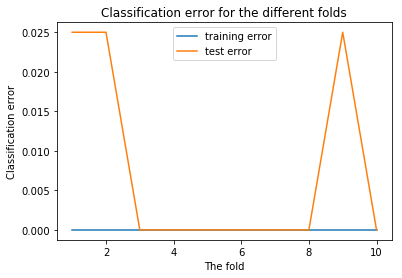

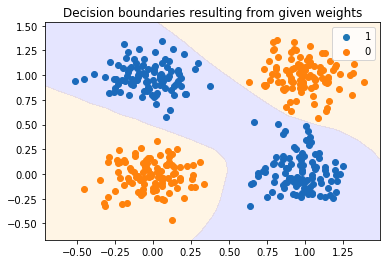

In [9]:
perceptron = mlp.MLP(X_xor,y_xor)
w_h,w_o,c = perceptron.learn_weights(nhidden=10, verbose = False)

train_errors = []
test_errors = []

K = 10
CV = KFold(n_splits=K)
for train_index, test_index in CV.split(X_xor):
    X_train, X_test = X_xor[train_index], X_xor[test_index]
    y_train, y_test = y_xor[train_index], y_xor[test_index]
    
    train_error = float("inf")
    test_error = 0
    for i in range(0, 5):
        perceptron2 = mlp.MLP(X_train,y_train)
        wh, wo, c = perceptron2.learn_weights(nhidden=10, verbose = False)
        
        if c < train_error:
            train_error = c
            _,_,_,_,y_hat = perceptron2.forwardprop(wh, wo, X = X_test)
            test_error = perceptron2.class_error(y_test, y_hat)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(range(1,len(train_errors)+1), train_errors, range(1,len(test_errors)+1), test_errors)
plt.title("Classification error for the different folds")
plt.xlabel("The fold")
plt.ylabel("Classification error")
plt.legend(["training error", "test error"])
plt.show()

perceptron.plot_boundaries(w_h,w_o,X_xor)

*Answer for 6.2.5:*

The decision boundaries of the network can be curved now, so you can curve around the point now. A drawback can be that some points can get a seperate dicision boundarie, overclassification will occure.